In [1]:
!pip install pytrends pandas numpy matplotlib seaborn scikit-learn

In [2]:
import pandas as pd
import numpy as np
import re
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout

# ✅ Step 1: Load Pre-Filtered Dataset
file_path = "/AUD_Project_Data.csv"  # Ensure correct path
df = pd.read_csv(file_path)

# ✅ Step 2: Define a List of Food-Related Terms (Dishes & Ingredients)
food_terms = [
    "pizza", "pasta", "burger", "steak", "ramen", "sushi", "tacos", "biryani", "pho", "shawarma",
    "dumplings", "ceviche", "falafel", "poke", "brunch", "pancakes", "waffles", "nachos",
    "barbecue", "hotdog", "fried chicken", "mac and cheese", "lasagna", "paella", "momos",
    "curry", "quesadilla", "fajitas", "spring rolls", "tandoori", "roti", "samosa", "poutine",
    "salad", "smoothie", "avocado toast", "bowl", "quinoa", "chia seeds", "almond milk",
    "kale", "spinach", "acai", "lentils", "hummus", "tofu", "jackfruit", "tempeh", "kombucha",
    "greek yogurt", "oats", "flaxseeds", "brown rice", "coconut water", "nut butter", "turmeric latte",
    "vegan", "vegetarian", "gluten-free", "keto", "paleo", "organic", "plant-based", "whole30",
    "dairy-free", "low-carb", "high-protein", "superfood", "farm-to-table", "raw food", "fermented food",
    "locally sourced", "sustainable eating", "macrobiotic","cupcake", "brownie", "cheesecake", "tiramisu", "churros", "croissant", "muffins", "cookies",
    "macarons", "donuts", "eclair", "gelato", "ice cream", "mochi", "sorbet", "baklava", "scones",
     "coffee", "matcha", "bubble tea", "cold brew", "chai latte", "turmeric latte", "protein shake",
    "detox juice", "green tea", "herbal tea", "smoothie", "milkshake", "craft beer", "mocktail",
    "cocktail", "kombucha", "hard seltzer"
]

# ✅ Step 3: Extract Food-Related Words from Review Text
def extract_food_terms(text):
    if pd.isna(text):
        return None  # Skip missing values
    words = re.findall(r'\b\w+\b', text.lower())  # Tokenize words
    food_mentions = [word for word in words if word in food_terms]  # Filter food words
    return ' '.join(food_mentions) if food_mentions else None  # Return food words as string

df["food_terms"] = df["text"].apply(extract_food_terms)

# ✅ Step 4: Remove Rows Without Food Mentions
df = df.dropna(subset=["food_terms"])

# ✅ Step 5: Aggregate Food & Dish Trends by Year
trend_counts = df.groupby(["year", "food_terms"]).size().unstack(fill_value=0)

# ✅ Step 6: Prepare Training & Testing Data
train_years = [2013, 2014, 2015]
test_years = [2016]

train_data = trend_counts.loc[train_years]
test_data = trend_counts.loc[test_years]

# ✅ Step 7: Display Data Shape
print(f"Training Data Shape: {train_data.shape}")
print(f"Testing Data Shape: {test_data.shape}")

Training Data Shape: (3, 4972)
Testing Data Shape: (1, 4972)


In [3]:
# ✅ Step 4: Normalize Data
scaler = MinMaxScaler(feature_range=(0, 1))
train_scaled = scaler.fit_transform(train_data)
test_scaled = scaler.transform(test_data)


In [4]:
# ✅ Step 5: Create LSTM Input Sequences (Time Steps = 3 Years)
X_train, y_train = [], []
for i in range(1, len(train_scaled)):
    X_train.append(train_scaled[i-1:i])  # Use previous year as input
    y_train.append(train_scaled[i])  # Predict current year
X_train, y_train = np.array(X_train), np.array(y_train)

In [5]:
# ✅ Step 6: Build LSTM Model
model = Sequential([
    LSTM(50, return_sequences=True, input_shape=(X_train.shape[1], X_train.shape[2])),
    Dropout(0.2),
    LSTM(50),
    Dense(train_scaled.shape[1])
])
model.compile(optimizer="adam", loss="mse")

/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [6]:
# ✅ Step 7: Train the Model
model.fit(X_train, y_train, epochs=50, batch_size=1, verbose=1)

Epoch 1/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 4s 73ms/step - loss: 0.2818
Epoch 2/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step - loss: 0.2770 
Epoch 3/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step - loss: 0.2744
Epoch 4/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step - loss: 0.2698
Epoch 5/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step - loss: 0.2653
Epoch 6/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step - loss: 0.2644
Epoch 7/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step - loss: 0.2615 
Epoch 8/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step - loss: 0.2496
Epoch 9/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step - loss: 0.2488
Epoch 10/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 75ms/step - loss: 0.2419
Epoch 11/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step - loss: 0.2255 
Epoch 12/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step - loss: 0.2228
Epoch 13/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step - loss: 0.2022 
Epoch 14/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step - loss: 0.1918
Epoch 15/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step - loss: 0.1836
Epoch 16/50
2/2 ━━━━━━━━━━━━━━

In [7]:
# ✅ Step 8: Predict Food Trends for 2016
X_test = train_scaled[-1].reshape(1, 1, train_scaled.shape[1])  # Use last year as input
predicted_trends = model.predict(X_test)

# ✅ Step 9: Convert Predictions Back to Original Scale
predicted_trends_original = scaler.inverse_transform(predicted_trends).flatten()

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 309ms/step


In [8]:
# ✅ Step 10: Map Predictions to Food Trend Words (Removing Duplicates)
def clean_trend_words(trend):
    """Removes duplicate words from trend labels (e.g., 'pizza pizza' -> 'pizza')."""
    words = trend.split()
    return " ".join(sorted(set(words), key=words.index))  # Preserve original order but remove duplicates

# ✅ Step 1: Extract Food Trend Names
food_trend_words = trend_counts.columns.tolist()

# ✅ Step 2: Clean the Trend Words (Remove Duplicates)
cleaned_trend_words = [clean_trend_words(trend) for trend in food_trend_words]

# ✅ Step 3: Create DataFrame for Predictions
predicted_trends_df = pd.DataFrame({'Food Trend': cleaned_trend_words,
                                    'Predicted Mentions': predicted_trends_original})

# ✅ Step 4: Sort by Most Mentioned Trends
predicted_trends_df = predicted_trends_df.sort_values(by="Predicted Mentions", ascending=False)

# ✅ Step 5: Display Top 20 Trends
print(predicted_trends_df.head(20))


      Food Trend  Predicted Mentions
3123       salad          146.782715
1107      coffee          101.992096
3737       steak          101.795410
229       brunch           85.509918
2622       pizza           84.269051
726       burger           65.120621
4106       tacos           58.573952
952     cocktail           57.776127
1599   dumplings           52.713818
2362       pasta           52.252506
2694       pizza           48.430332
52          bowl           46.502193
1144      coffee           36.509930
3939       sushi           35.792290
2722       pizza           35.162807
1445       curry           34.272545
3855       steak           33.780045
3631     spinach           32.251934
4686  vegetarian           32.027374
3317       salad           30.969994


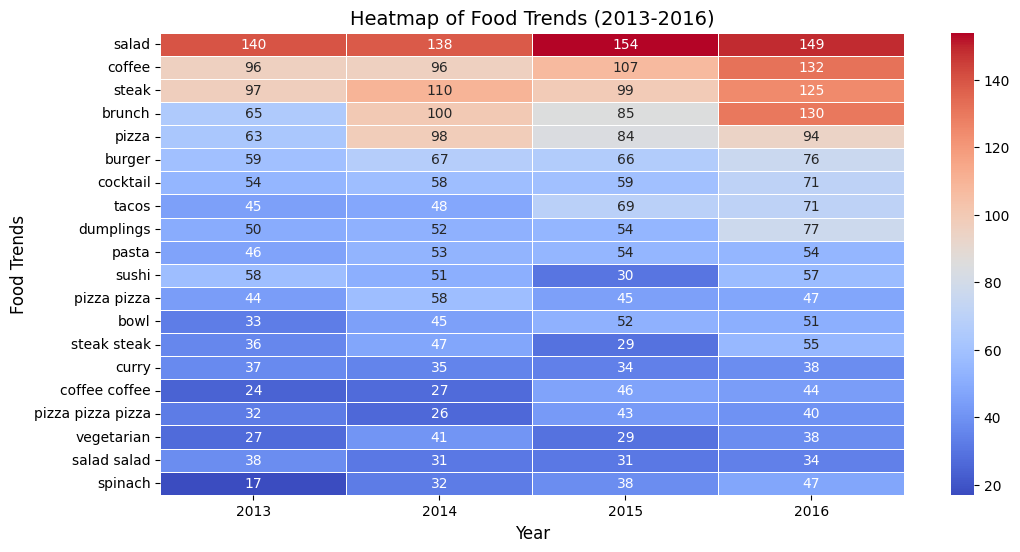

In [9]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# ✅ Step 1: Aggregate Food Trends by Year
food_trend_evolution = df.groupby(['year', 'food_terms'])['food_terms'].count().unstack(fill_value=0)

# ✅ Step 2: Select Top 20 Most Mentioned Food Trends
top_trends = food_trend_evolution.sum().sort_values(ascending=False).head(20).index
trend_data = food_trend_evolution[top_trends]

# ✅ Step 4: Heatmap for Food Trends Over Years
plt.figure(figsize=(12, 6))
sns.heatmap(trend_data.T, cmap="coolwarm", annot=True, fmt="d", linewidths=0.5)
plt.xlabel("Year", fontsize=12)
plt.ylabel("Food Trends", fontsize=12)
plt.title("Heatmap of Food Trends (2013-2016)", fontsize=14)
plt.show()

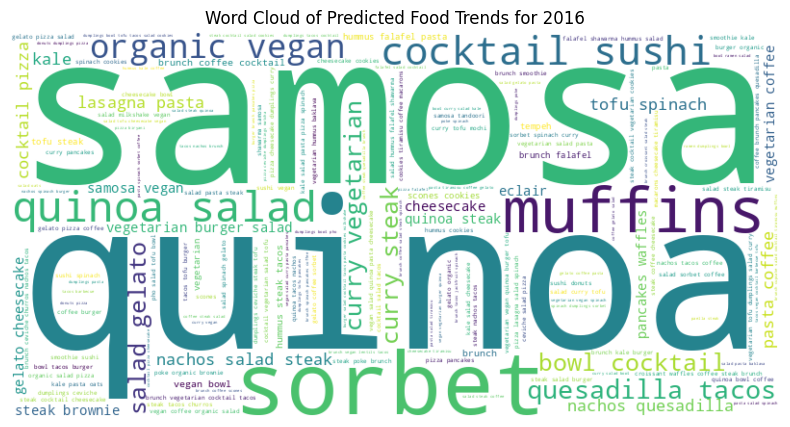

In [10]:
# ✅ Import Required Libraries
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# ✅ Step 12: Generate Word Cloud for 2016 Predicted Trends
wordcloud = WordCloud(
    width=800, height=400, background_color="white"
).generate_from_frequencies(
    dict(zip(predicted_trends_df['Food Trend'], predicted_trends_df['Predicted Mentions']))
)

# ✅ Plot the Word Cloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.title("Word Cloud of Predicted Food Trends for 2016")
plt.show()


<ipython-input-12-3cb17e87ba8f>:31: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_20_shifts.index, y=top_20_shifts.values, palette="coolwarm")


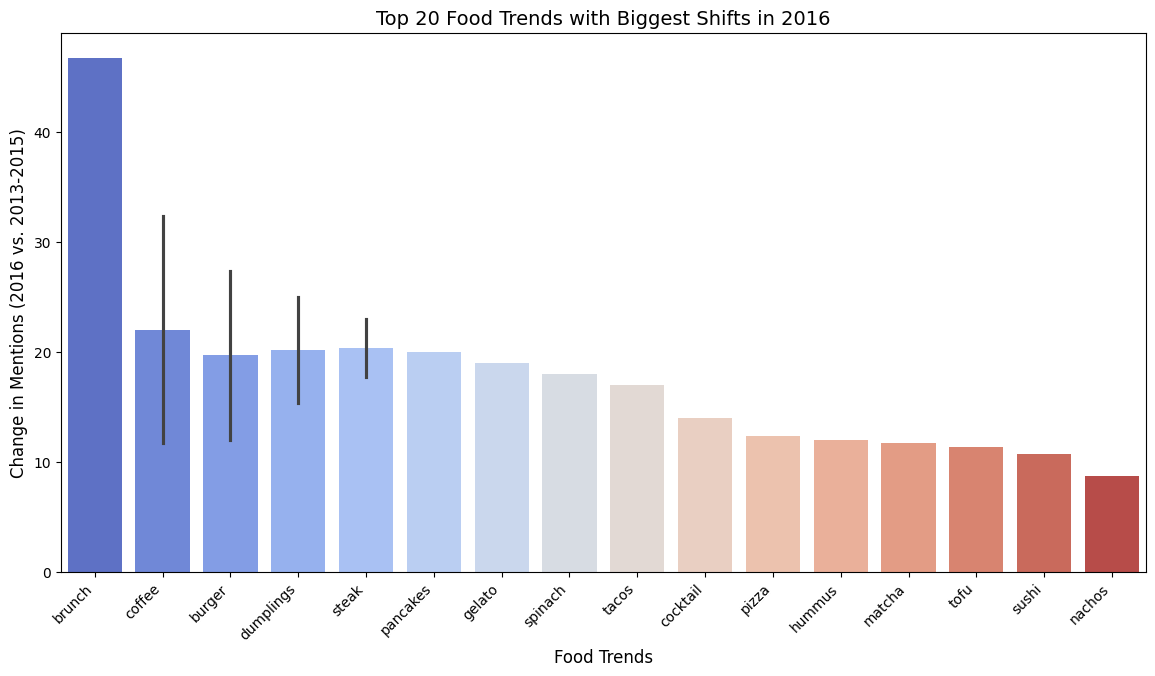

In [12]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# ✅ Step 1: Function to Remove Duplicate Words from Trend Labels
def clean_trend_words(trend):
    """Removes duplicate words from trend labels (e.g., 'pizza pizza' -> 'pizza')."""
    words = trend.split()
    return " ".join(sorted(set(words), key=words.index))  # Preserve original order but remove duplicates

# ✅ Step 2: Compute Average Mentions for 2013-2015
trend_2013_2015_avg = food_trend_evolution.loc[2013:2015].mean()

# ✅ Step 3: Get Mentions for 2016
trend_2016 = food_trend_evolution.loc[2016]

# ✅ Step 4: Compute the Difference (Increase or Decrease)
trend_shift = trend_2016 - trend_2013_2015_avg

# ✅ Step 5: Sort Trends by the Largest Positive and Negative Shift
top_20_shifts = trend_shift.abs().sort_values(ascending=False).head(20)  # Top 20 shifting trends

# ✅ Step 6: Clean Trend Labels to Remove Repeated Words
cleaned_trend_labels = [clean_trend_words(trend) for trend in top_20_shifts.index]

# ✅ Step 7: Update Index with Cleaned Labels
top_20_shifts.index = cleaned_trend_labels

# ✅ Step 8: Bar Chart for Top 20 Increasing & Decreasing Trends
plt.figure(figsize=(14, 7))
sns.barplot(x=top_20_shifts.index, y=top_20_shifts.values, palette="coolwarm")
plt.xlabel("Food Trends", fontsize=12)
plt.ylabel("Change in Mentions (2016 vs. 2013-2015)", fontsize=12)
plt.title("Top 20 Food Trends with Biggest Shifts in 2016", fontsize=14)
plt.xticks(rotation=45, ha="right")
plt.show()

<ipython-input-14-17733d0ce27e>:31: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=decreasing_trends.index, y=decreasing_trends.values, palette="Blues_r")  # Reverse Blues for decrease


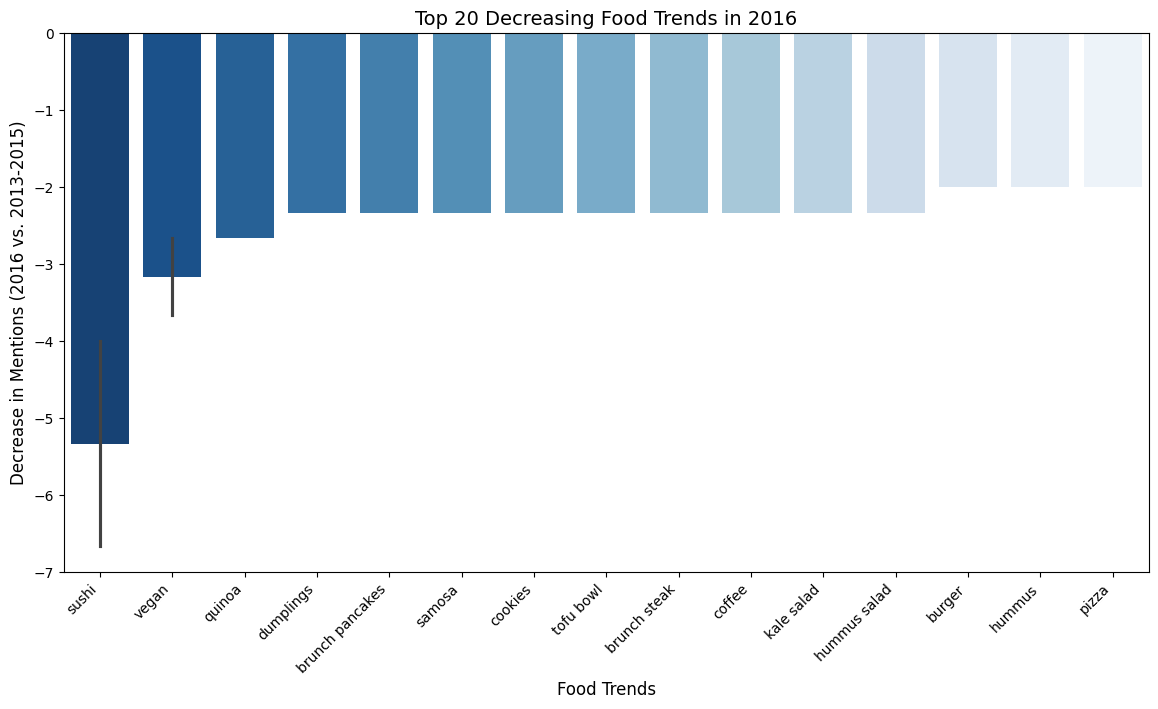

In [14]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# ✅ Step 1: Function to Remove Duplicate Words from Trend Labels
def clean_trend_words(trend):
    """Removes duplicate words from trend labels (e.g., 'pizza pizza' -> 'pizza')."""
    words = trend.split()
    return " ".join(sorted(set(words), key=words.index))  # Preserve original order but remove duplicates

# ✅ Step 2: Compute Average Mentions for 2013-2015
trend_2013_2015_avg = food_trend_evolution.loc[2013:2015].mean()

# ✅ Step 3: Get Mentions for 2016
trend_2016 = food_trend_evolution.loc[2016]

# ✅ Step 4: Compute the Difference (Decrease = Negative Shift)
trend_shift = trend_2016 - trend_2013_2015_avg

# ✅ Step 5: Filter Only Decreasing Trends (Negative Values)
decreasing_trends = trend_shift[trend_shift < 0].sort_values().head(20)  # Select Top 20 Decreases

# ✅ Step 6: Clean Trend Labels to Remove Repeated Words
cleaned_trend_labels = [clean_trend_words(trend) for trend in decreasing_trends.index]

# ✅ Step 7: Update Index with Cleaned Labels
decreasing_trends.index = cleaned_trend_labels

# ✅ Step 8: Bar Chart for Top Decreasing Trends
plt.figure(figsize=(14, 7))
sns.barplot(x=decreasing_trends.index, y=decreasing_trends.values, palette="Blues_r")  # Reverse Blues for decrease
plt.xlabel("Food Trends", fontsize=12)
plt.ylabel("Decrease in Mentions (2016 vs. 2013-2015)", fontsize=12)
plt.title("Top 20 Decreasing Food Trends in 2016", fontsize=14)
plt.xticks(rotation=45, ha="right")
plt.show()
